In [45]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [46]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

In [47]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [48]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [49]:
zeros = np.load('zeros.npy')
print zeros.shape
label = np.array([])
for i in range(0,zeros.shape[0]):
    label = np.append(label,np.array([1,0,0,0,0,0,0,0,0,0]))
label = label.reshape((zeros.shape[0],10))
print label.shape

(449, 784)
(449, 10)


In [63]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xs = np.append(batch_xs, zeros).reshape((batch_xs.shape[0]+zeros.shape[0],28*28))
    batch_ys = np.append(batch_ys,label).reshape((batch_ys.shape[0]+label.shape[0],10))
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [51]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [52]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.098


In [53]:
np.save('W',(sess.run(W)))
np.save('b', (sess.run(b)))

# Verify the Model

In [65]:
def neuralprocess(W,b,Input):
    output=tf.nn.softmax(tf.matmul(Input, W) + b)
    return output

In [55]:
W = np.load('W.npy')
b = np.load('b.npy')

In [56]:
print batch_xs.shape
print batch_ys.shape
print W.shape
print b.shape
a = batch_xs[0,:]
b = batch_xs[1,:]
c = np.append(a, b).reshape((2,a.shape[0]))
print a.shape,b.shape,c.shape

(549, 784)
(549, 10)
(784, 10)
(10,)
(784,) (784,) (2, 784)


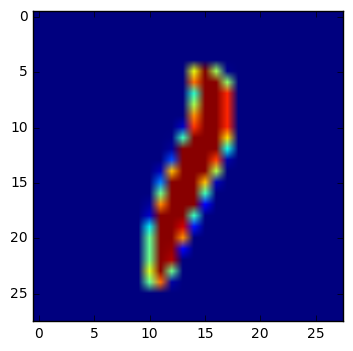

In [57]:
imgplot = plt.imshow(batch_xs[6,:].reshape((28,28)))

In [58]:
zeros = np.load('zeros.npy')
print zeros.shape

(449, 784)


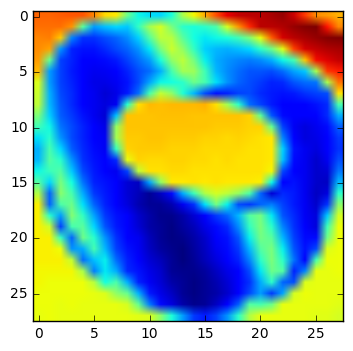

In [59]:
plt.imshow(zeros[445,:].reshape((28,28)))

In [60]:
a = batch_xs
b = zeros
c = np.append(a, b).reshape((a.shape[0]+b.shape[0],28*28))
print c.shape

(998, 784)


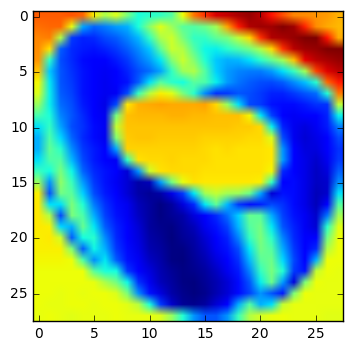

In [61]:
plt.imshow(c[540,:].reshape((28,28)))

In [66]:
neuralprocess(W,b,c[540,:])

TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type float64 of argument 'a'.